In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind, mannwhitneyu
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_2023= pd.read_csv('data/2023/외래관광객조사_2023_전처리2.csv')
df_2024= pd.read_csv('data/2024/외래관광객조사_2024_전처리2.csv')

In [4]:
df_2023

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,Q8a12,Q8_1a1,Q8_1a2,Q8_1a3,동행자유형,국가명,웰니스참여,웰니스만족,log_총액,year
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8,1.0,2.0,혼자,대만,0,0,6.996874,2023
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11,2.0,3.0,혼자,중국,1,1,7.390971,2023
2,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2,4.0,1.0,혼자,중국,0,0,7.406201,2023
3,5,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,5,1.0,11.0,친구,홍콩,0,0,7.038862,2023
4,3,8,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,2,3.0,1.0,친구,대만,1,1,7.197884,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,12.0,11,10.0,12.0,친구,중국,1,1,6.830853,2023
8350,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,2.0,1.0,친구,중국,1,1,8.478928,2023
8351,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,4.0,9.0,친구,중국,1,1,5.819133,2023
8352,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,1.0,2.0,친구,중국,1,1,5.879890,2023


In [5]:
df_2024

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,Q8a12,Q8_1a1,Q8_1a2,Q8_1a3,동행자유형,국가명,웰니스참여,웰니스만족,log_총액,year
0,3,5,2,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,NaN,1,2.0,5.0,가족,대만,0,0,6.740959,2024
1,3,6,2,NaN,NaN,NaN,4.0,NaN,NaN,7.0,...,12.0,12,1.0,2.0,가족,대만,1,1,6.610627,2024
2,1,6,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,11,1.0,3.0,혼자,중국,1,1,6.589279,2024
3,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,12.0,2,12.0,5.0,가족,대만,1,1,7.138689,2024
4,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,12.0,12,6.0,1.0,가족,대만,1,1,6.931746,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8764,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,NaN,3,2.0,1.0,친구,중국,1,1,6.053570,2024
8765,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2,1.0,NaN,가족,중국,0,0,4.946861,2024
8766,1,5,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,13,3.0,2.0,가족,중국,1,1,7.845392,2024
8767,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,3,2.0,NaN,가족,중국,1,1,6.426246,2024


In [6]:
# 2024년 컬럼명 통일
df_2024.rename(columns={
    '총액1인TOT_개별국제 교통비제외2': '총액1인TOT항공제외2'
}, inplace=True)

In [7]:
# 23, 24년도 데이터 병합
df_all = pd.concat([df_2023, df_2024], ignore_index=True)

In [8]:
# 병합된 데이터 확인
print(df_all.shape)
print(df_all['year'].value_counts())  # 연도별 분포 확인

(17123, 26)
year
2024    8769
2023    8354
Name: count, dtype: int64


## 1차 검증

### 웰니스 참여 여부에 따른 체류일수 차이
- 참여자가 더 오래 머무는가?

In [9]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['M일HAP']
g2 = df_all[df_all['웰니스참여'] == 0]['M일HAP']

# t-test
t_stat, p_value = ttest_ind(g1, g2, equal_var=False)
print("t-test p-value:", p_value)

t-test p-value: 7.838559429817032e-14


- 웰니스 참여자와 비참여자의 체류일수 평균은 통계적으로 매우 유의미하게 다름

In [10]:
# 그룹별 평균값 비교
# 얼마나 다른지 확인하기 위해 
print("참여자 평균 체류일수:", g1.mean())
print("비참여자 평균 체류일수:", g2.mean())

참여자 평균 체류일수: 7.965176427119896
비참여자 평균 체류일수: 6.895188184849928


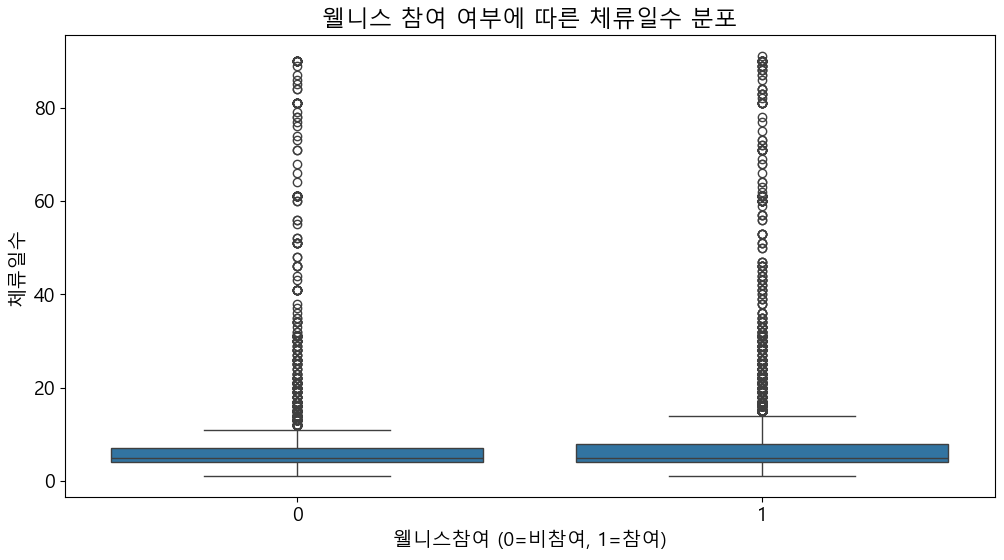

In [11]:
sns.boxplot(x='웰니스참여', y='M일HAP', data=df_all)
plt.title("웰니스 참여 여부에 따른 체류일수 분포")
plt.xlabel("웰니스참여 (0=비참여, 1=참여)")
plt.ylabel("체류일수")
plt.show()


In [12]:
print("참여자 중위 체류일수:", g1.median())
print("비참여자 중위 체류일수:", g2.median())

참여자 중위 체류일수: 5.0
비참여자 중위 체류일수: 5.0


In [13]:
# 효과 크기 계산
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = (((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx + ny - 2))**0.5
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(g1, g2)
print(f"Cohen's d: {d:.3f}")

Cohen's d: 0.119


- 체류일수 차이는 통계적으로 유의하긴 하지만 실질적인 차이는 매우 작음

In [14]:
# Mann-Whitney U
u_stat, p_u = mannwhitneyu(g1, g2, alternative='two-sided')
print("Mann-Whitney U p-value:", p_u)

Mann-Whitney U p-value: 1.7943239073687102e-117


In [15]:
# Cliff’s Delta (효과크기)
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    more = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    return (more - less) / (nx * ny)

# 예시: g1, g2는 참여/비참여자 체류일수
delta = cliffs_delta(g1, g2)
print(f"Cliff's Delta: {delta:.3f}")


Cliff's Delta: 0.208


- 웰니스 참여자와 비참여자의 체류일수 분포 차이는 “작은 효과” 수준으로 존재
- 참여 여부에 따른 체류일수 차이는 통계적으로는 유의미하지만, 실질적 크기는 작음

### 웰니스 참여자 vs 비참여자 간의 총소비금액(총액1인TOT항공제외2) 비교

In [16]:
# 그룹 나누기
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [17]:
# t-test
t_stat, p_value = ttest_ind(g1, g2, equal_var=False)
print("t-test p-value:", p_value)

t-test p-value: 0.16159905261448


In [18]:
# 평균·중위수 비교
print("참여자 평균 지출:", g1.mean())
print("비참여자 평균 지출:", g2.mean())
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 평균 지출: 1425.8381892523364
비참여자 평균 지출: 1381.539875699192
참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


In [19]:
# Mann-Whitney
# 그룹 나누기 
g1 = df_all[df_all['웰니스참여'] == 1]['총액1인TOT항공제외2'].dropna()
g2 = df_all[df_all['웰니스참여'] == 0]['총액1인TOT항공제외2'].dropna()

In [20]:
# Mann-Whitney 
u_stat, p_u = mannwhitneyu(g1, g2, alternative='two-sided')
print("Mann-Whitney U p-value:", p_u)

Mann-Whitney U p-value: 7.742785605265836e-10


- 웰니스 활동 참여 여부에 따라 총지출의 분포에는 유의미한 차이가 존재함
- 평균 지출은 비슷하더라도, 일부 고액 소비자가 참여자 쪽에 더 많이 존재할 가능성이 있음

In [21]:
print("참여자 중위 지출:", g1.median())
print("비참여자 중위 지출:", g2.median())

참여자 중위 지출: 1030.2800000000002
비참여자 중위 지출: 941.93


In [22]:
# 효과 크기
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    more = sum(i > j for i in x for j in y)
    less = sum(i < j for i in x for j in y)
    return (more - less) / (nx * ny)

delta = cliffs_delta(g1, g2)
print(f"Cliff's Delta 효과크기: {delta:.3f}")

Cliff's Delta 효과크기: 0.080


- 웰니스 활동 참여자와 비참여자 간의 총소비지출 평균은 유의미한 차이가 없었고,
분포 수준에서도 통계적으로 유의한 차이는 있었으나,
효과 크기(Cliff’s δ = 0.080)가 매우 작아 실질적 차이는 사실상 무시할 수 있는 수준으로 해석된다.

### 웰니스 참여자 중 만족자 비율(전환률)
- 웰니스 활동(자연경관 감상, 뷰티/미용 관광)에 참여한 사람 중,
- 실제로 그 활동이 만족도 3순위 안으로 선택되었는지를 보는 것

In [23]:
# 웰니스 참여자 중, 실제로 해당 활동에 대해 만족한 비율을 계산
# 전체 참여자 중 만족자 비율 (전환률)
참여자 = df_all[df_all['웰니스참여'] == 1]
전환률 = 참여자['웰니스만족'].mean()

print(f"웰니스 참여 → 만족 전환률: {전환률:.2%}")

웰니스 참여 → 만족 전환률: 75.91%


In [24]:
# 국적별 전환률
전환률_국가별 = 참여자.groupby('국가명')['웰니스만족'].mean().sort_values(ascending=False)
print(전환률_국가별)

국가명
태국      0.864447
중국      0.858931
베트남     0.785303
대만      0.781991
싱가포르    0.769386
홍콩      0.767574
일본      0.693017
중동      0.681159
미국      0.678927
영국      0.656652
독일      0.652812
Name: 웰니스만족, dtype: float64


In [25]:
# 동행자유형별 전환률
# 웰니스 참여자만 필터링
참여자 = df_all[df_all['웰니스참여'] == 1]

# 동행자 유형별 전환률 계산
전환률_동행자 = 참여자.groupby('동행자유형')['웰니스만족'].mean().sort_values(ascending=False)
print(전환률_동행자)

동행자유형
직장동료    0.831325
혼자      0.775297
가족      0.753985
친구      0.747891
기타      0.666667
Name: 웰니스만족, dtype: float64


- 웰니스 활동 참여자의 4명 중 3명 이상이 웰니스 활동을 만족한 활동(Top3) 중 하나로 선택했다는 의미 ->콘텐츠 만족도는 매우 높다고 볼 수 있음
- 동남아 국가군(태국, 베트남, 대만 등)은 참여→만족 전환률이 매우 높아 마케팅 집중 타깃으로 적합
- 서구권 국가군(미국, 유럽 등)은 상대적으로 낮은 편 → 콘텐츠 개선 or 다른 전략 필요
- 직장동료 → 웰니스+팀워크, 리프레시 콘텐츠에 대한 수요 강함
- 혼자/가족 → 개인 힐링, 가족형 콘텐츠로 확장 가능
- 친구 → 감성/경험 중심 웰니스도 효과 있음

- 웰니스 참여가 지출·체류일에 미치는 절대적 효과는 작음 
- 하지만 일부 국적/동행자는 만족도가 확실히 높음
- 컨텐츠 자체가 효율적인 타깃에게만 강하게 작용할 가능성 존재
- 분류 기준(국적/동행자/참여+만족 조합 등)에 따라 세분화해서 분석할 필요가 있어보임
- 어떤 그룹이 참여하고, 만족하고, 체류도 오래하며 소비도 많은가

In [27]:
df_all.to_csv("data/외래관광객조사_병합.csv", index=False, encoding='utf-8-sig')